Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


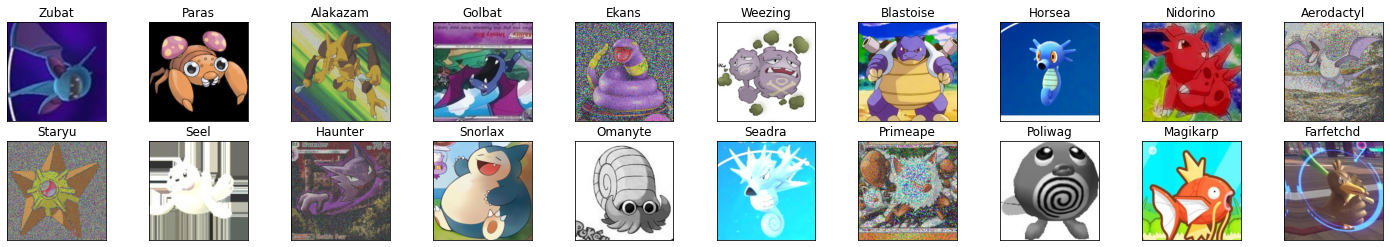

In [13]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from math import floor
import os
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)
torch.manual_seed(102)

from google.colab import drive
drive.mount('/content/gdrive')
train_path = "/content/gdrive/My Drive/APS360 Team Project/AUG DATAS/Gen1_Aug"

data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor()])

train_datasets = torchvision.datasets.ImageFolder(root= train_path, transform = data_transforms) 

hyperparameters = [30,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)


dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    print(idx)

    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(pokemon_names[labels[idx]])






In [ ]:
train_path = "/content/gdrive/My Drive/APS360 Team Project/Train/Training_Gen1"
data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor()])
train_datasets = torchvision.datasets.ImageFolder(root= train_path, transform = data_transforms)

hyperparameters = [1,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False)
def features_to_folder(loader, path):
    n = 0
    for img, label in loader:

      features = alexnet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())
      x = torch.tensor(label)
      q = x.item()

      folder_name = path + '/' + str(pokemon_names[q])
      if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n += 1

features_to_folder(train_loader, train_path)

<ipython-input-101-53e6a94232d5>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(label)


KeyboardInterrupt: ignored

In [2]:
def graph_features(fig, classes):
  for i in np.arange(20):
      ax = fig.add_subplot(2, int(20/2), i+1, xticks=[], yticks=[])
      plt.imshow(np.transpose(images[i], (1, 2, 0)))
      ax.set_title(classes[labels[i]])

In [3]:
pokemon_names = [
    "Abra",
    "Aerodactyl",
    "Alakazam",
    "Arbok",
    "Arcanine",
    "Articuno",
    "Beedrill",
    "Bellsprout",
    "Blastoise",
    "Bulbasaur",
    "Butterfree",
    "Caterpie",
    "Chansey",
    "Charizard",
    "Charmander",
    "Charmeleon",
    "Clefable",
    "Clefairy",
    "Cloyster",
    "Cubone",
    "Dewgong",
    "Diglett",
    "Ditto",
    "Dodrio",
    "Doduo",
    "Dragonair",
    "Dragonite",
    "Dratini",
    "Drowzee",
    "Dugtrio",
    "Eevee",
    "Ekans",
    "Electabuzz",
    "Electrode",
    "Exeggcute",
    "Exeggutor",
    "Farfetchd",
    "Fearow",
    "Flareon",
    "Gastly",
    "Gengar",
    "Geodude",
    "Gloom",
    "Golbat",
    "Goldeen",
    "Golduck",
    "Golem",
    "Graveler",
    "Grimer",
    "Growlithe",
    "Gyarados",
    "Haunter",
    "Hitmonchan",
    "Hitmonlee",
    "Horsea",
    "Hypno",
    "Ivysaur",
    "Jigglypuff",
    "Jolteon",
    "Jynx",
    "Kabuto",
    "Kabutops",
    "Kadabra",
    "Kakuna",
    "Kangaskhan",
    "Kingler",
    "Koffing",
    "Krabby",
    "Lapras",
    "Lickitung",
    "Machamp",
    "Machoke",
    "Machop",
    "Magikarp",
    "Magmar",
    "Magnemite",
    "Magneton",
    "Mankey",
    "Marowak",
    "Meowth",
    "Metapod",
    "Mew",
    "Mewtwo",
    "Moltres",
    "MrMime",
    "Muk",
    "Nidoking",   
    "Nidoqueen",     
    "Nidorina",  
    "Nidorino",   
    "Ninetales",    
    "Oddish",    
    "Omanyte",    
    "Omastar",    
    "Onix",    
    "Paras",    
    "Parasect",    
    "Persian",    
    "Pidgeot",    
    "Pidgeotto",   
    "Pidgey",    
    "Pikachu",    
    "Pinsir",    
    "Poliwag",    
    "Poliwhirl",    
    "Poliwrath",    
    "Ponyta",    
    "Porygon",    
    "Primeape",    
    "Psyduck",    
    "Raichu",    
    "Rapidash",    
    "Raticate",    
    "Rattata",    
    "Rhydon",    
    "Rhyhorn",    
    "Sandshrew",    
    "Sandslash",    
    "Scyther",    
    "Seadra",    
    "Seaking",    
    "Seel",    
    "Shellder",    
    "Slowbro",    
    "Slowpoke",    
    "Snorlax",    
    "Spearow",    
    "Squirtle",    
    "Starmie",    
    "Staryu",    
    "Tangela",    
    "Tauros",    
    "Tentacool",    
    "Tentacruel",    
    "Vaporeon",  
    "Venomoth",    
    "Venonat",   
    "Venusaur",    
    "Victreebel",    
    "Vileplume",    
    "Voltorb",    
    "Vulpix",    
    "Wartortle",    
    "Weedle",    
    "Weepinbell",    
    "Weezing",    
    "Wigglytuff",    
    "Zapdos",    
    "Zubat"
]
print(len(pokemon_names))

149


In [ ]:
train_path = "/content/gdrive/My Drive/APS360 Team Project/Train/Training_Gen1"
train_dataset_new = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))

In [ ]:
#Base AlexNet
class Pokemon_Classifier_AlexNet(nn.Module):
    def __init__(self, name = "Pokemon_Classifier_AlexNet"):
          self.name = "Pokemon_Classifier_AlexNet"
          super(Pokemon_Classifier_AlexNet, self).__init__()
          self.conv1 = nn.Conv2d(256, 50, 2) #in_channels, out_chanels, kernel_size
          self.conv2 = nn.Conv2d(50, 10, 2) #in_channels, out_chanels, kernel_size
          self.fc1 = nn.Linear(10*4*4, 300)
          self.fc2 = nn.Linear(300, 149)

    def forward(self, x):
          x = F.relu(self.conv1(x))
          x = F.relu(self.conv2(x))
          x = x.view(-1, 10*4*4)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
def train(model, train_dataset, batch_size=128, learning_rate=0.001, num_epochs=20):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                              num_workers=1, shuffle=True, drop_last = True)
    train_acc = np.zeros(num_epochs)
    loss_chart = np.zeros(num_epochs)
    epochs = []

    # training

    n = 0
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        for imgs, labels in iter(train_loader):

            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
        n += 1
        epochs.append(n)          
        
        # track accuracy
        train_acc[epoch] = get_accuracy(model, train_loader)
        loss_chart[epoch] = float(loss)/batch_size
        model_path = f"model_{model.name}_bs{batch_size}_lr{learning_rate}_epoch{epoch}"
        torch.save(model.state_dict(), model_path)


        print((f"Epoch {epoch+1}: Train accuracy = {train_acc[epoch]}"))

    epochs = np.arange(1, num_epochs + 1)

    plotting(epochs,loss_chart,train_acc)

    return train_acc, epochs

In [ ]:
def plotting(epochs, loss_chart, train_acc):
    plt.title("Training Loss Curve")
    plt.plot(epochs, loss_chart, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Accuracy Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def get_accuracy(model, test_loader):
    data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

Epoch 1: Train acc: 0.375
Epoch 2: Train acc: 0.6334965437788018
Epoch 3: Train acc: 0.7232142857142857
Epoch 4: Train acc: 0.7903225806451613
Epoch 5: Train acc: 0.8685195852534562
Epoch 6: Train acc: 0.8958813364055299
Epoch 7: Train acc: 0.8966013824884793
Epoch 8: Train acc: 0.9268433179723502
Epoch 9: Train acc: 0.9194988479262672
Epoch 10: Train acc: 0.9483006912442397


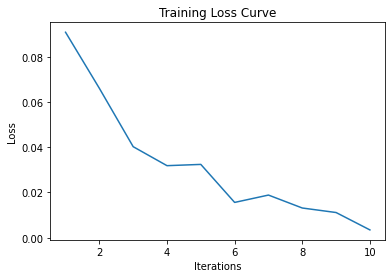

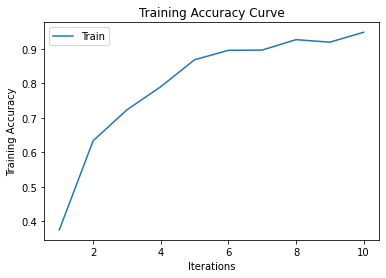

(array([0.375     , 0.63349654, 0.72321429, 0.79032258, 0.86851959,
        0.89588134, 0.89660138, 0.92684332, 0.91949885, 0.94830069]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [ ]:
model = Pokemon_Classifier_AlexNet()
train(model, train_dataset_new, batch_size = 32, learning_rate = 0.001, num_epochs=10)